In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import Library

In [2]:
import random
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, MaxPool2D 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Concatenate, Lambda
from tensorflow.keras import backend
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2
from keras.applications.inception_v3 import preprocess_input

Mount Google Drive

In [4]:
# Using GDrive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Load Data

In [5]:
# Specify the path to the folder containing the skin disease pictures in your Google Drive
folder_path = '/content/gdrive/MyDrive/Datasett/train'

# Initialize an empty list to store the extracted data
data = []

# Iterate through the subdirectories (folders) in the specified folder
for subdir in os.listdir(folder_path):
    subdir_path = os.path.join(folder_path, subdir)
    if os.path.isdir(subdir_path):
        # Iterate through the image files in each subdirectory
        for file in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file)
            # Extract the disease category from the folder name
            category = subdir
            # Append the file path and category to the data list
            data.append((file_path, category))

# Create a pandas DataFrame from the data list
df_train = pd.DataFrame(data, columns=['Path', 'Category'])

# Print the resulting table
print(df_train)

                                                    Path         Category
0      /content/gdrive/MyDrive/Datasett/train/Vascula...  Vascular Tumors
1      /content/gdrive/MyDrive/Datasett/train/Vascula...  Vascular Tumors
2      /content/gdrive/MyDrive/Datasett/train/Vascula...  Vascular Tumors
3      /content/gdrive/MyDrive/Datasett/train/Vascula...  Vascular Tumors
4      /content/gdrive/MyDrive/Datasett/train/Vascula...  Vascular Tumors
...                                                  ...              ...
12009  /content/gdrive/MyDrive/Datasett/train/Acne/ac...             Acne
12010  /content/gdrive/MyDrive/Datasett/train/Acne/ac...             Acne
12011  /content/gdrive/MyDrive/Datasett/train/Acne/ac...             Acne
12012  /content/gdrive/MyDrive/Datasett/train/Acne/ac...             Acne
12013  /content/gdrive/MyDrive/Datasett/train/Acne/ac...             Acne

[12014 rows x 2 columns]


In [6]:
# Specify the path to the folder containing the skin disease pictures in your Google Drive
folder_path = '/content/gdrive/MyDrive/Datasett/test'

# Initialize an empty list to store the extracted data
data = []

# Iterate through the subdirectories (folders) in the specified folder
for subdir in os.listdir(folder_path):
    subdir_path = os.path.join(folder_path, subdir)
    if os.path.isdir(subdir_path):
        # Iterate through the image files in each subdirectory
        for file in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, file)
            # Extract the disease category from the folder name
            category = subdir
            # Append the file path and category to the data list
            data.append((file_path, category))

# Create a pandas DataFrame from the data list
df_test = pd.DataFrame(data, columns=['Path', 'Category'])

# Print the resulting table
print(df_test)

                                                   Path    Category
0     /content/gdrive/MyDrive/Datasett/test/Versicol...  Versicolor
1     /content/gdrive/MyDrive/Datasett/test/Versicol...  Versicolor
2     /content/gdrive/MyDrive/Datasett/test/Versicol...  Versicolor
3     /content/gdrive/MyDrive/Datasett/test/Versicol...  Versicolor
4     /content/gdrive/MyDrive/Datasett/test/Versicol...  Versicolor
...                                                 ...         ...
1064  /content/gdrive/MyDrive/Datasett/test/Eczema/e...      Eczema
1065  /content/gdrive/MyDrive/Datasett/test/Eczema/e...      Eczema
1066  /content/gdrive/MyDrive/Datasett/test/Eczema/e...      Eczema
1067  /content/gdrive/MyDrive/Datasett/test/Eczema/e...      Eczema
1068  /content/gdrive/MyDrive/Datasett/test/Eczema/e...      Eczema

[1069 rows x 2 columns]


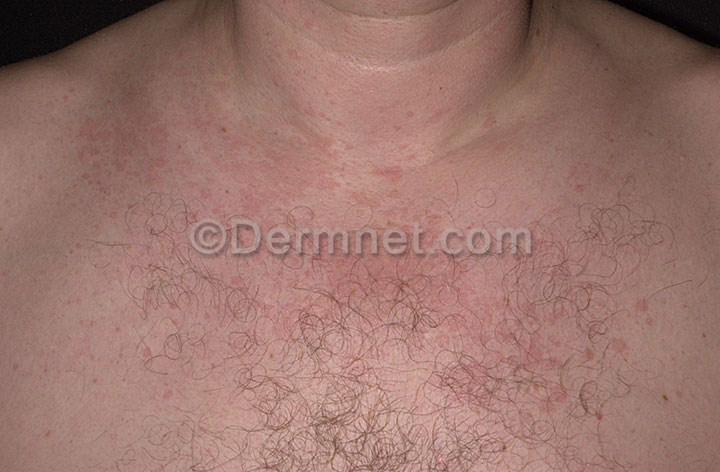

In [7]:
from PIL import Image
from IPython.display import display

# Specify the index of the image you want to access
image_index = 0

# Get the file path and category of the image at the specified index
file_path = df_test.loc[image_index, 'Path']
category = df_test.loc[image_index, 'Category']

# Open the image using Pillow (PIL)
image = Image.open(file_path)

# Perform further processing on the image
# ...

# Display the image
display(image)

In [8]:
# Specify the index of the image you want to check
image_index = 100

# Get the file path of the image at the specified index
file_path = df_test.loc[image_index, 'Path']

# Open the image using Pillow (PIL)
image = Image.open(file_path)

# Get the size (dimensions) of the image
image_size = image.size

# Print the size of the image
print(f"Image size at index {image_index}: {image_size}")

Image size at index 100: (720, 474)


In [9]:
# Specify the index of the image you want to check
image_index = 100

# Get the file path of the image at the specified index
file_path = df_train.loc[image_index, 'Path']

# Open the image using Pillow (PIL)
image = Image.open(file_path)

# Get the size (dimensions) of the image
image_size = image.size

# Print the size of the image
print(f"Image size at index {image_index}: {image_size}")

Image size at index 100: (720, 515)


Resize Image

In [10]:
import os
from PIL import Image

# Specify the directory containing the images
directory = '/content/gdrive/MyDrive/Datasett'

# Specify the desired width and height
desired_width = 260
desired_height = 260

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust the file extensions as needed
        # Open the image file
        file_path = os.path.join(directory, filename)
        img = Image.open(file_path)

        # Resize the image
        resized_img = img.resize((desired_width, desired_height))

        # Save the resized image, overwriting the original file
        resized_img.save(file_path)

        # Optionally, you can save the resized image with a different filename
        # resized_filename = 'resized_' + filename
        # resized_file_path = os.path.join(directory, resized_filename)
        # resized_img.save(resized_file_path)

        print(f"Resized {filename}")

print("Image resizing complete.")

Image resizing complete.


Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder

def encode_category(df):
    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()

    # Fit the LabelEncoder on the 'category' column and transform the values
    encoded_categories = label_encoder.fit_transform(df['Category'])

    # Replace the 'category' column in the DataFrame with the encoded values
    df['Category'] = encoded_categories

    # Return the modified DataFrame
    return df

# Assuming 'df_train' and 'df_test' are your original DataFrames
df_train_encoded = encode_category(df_train)
df_test_encoded = encode_category(df_test)

# Print the modified DataFrames
print(df_train_encoded)
print(df_test_encoded)

                                                    Path  Category
0      /content/gdrive/MyDrive/Datasett/train/Vascula...         9
1      /content/gdrive/MyDrive/Datasett/train/Vascula...         9
2      /content/gdrive/MyDrive/Datasett/train/Vascula...         9
3      /content/gdrive/MyDrive/Datasett/train/Vascula...         9
4      /content/gdrive/MyDrive/Datasett/train/Vascula...         9
...                                                  ...       ...
12009  /content/gdrive/MyDrive/Datasett/train/Acne/ac...         0
12010  /content/gdrive/MyDrive/Datasett/train/Acne/ac...         0
12011  /content/gdrive/MyDrive/Datasett/train/Acne/ac...         0
12012  /content/gdrive/MyDrive/Datasett/train/Acne/ac...         0
12013  /content/gdrive/MyDrive/Datasett/train/Acne/ac...         0

[12014 rows x 2 columns]
                                                   Path  Category
0     /content/gdrive/MyDrive/Datasett/test/Versicol...        11
1     /content/gdrive/MyDrive/Datasett

Mengecek missing value

In [12]:
print(df_train_encoded.isna().sum())

Path        0
Category    0
dtype: int64


In [13]:
print(df_test_encoded.isna().sum())

Path        0
Category    0
dtype: int64


Split data

In [14]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and validation sets
df_train_encoded, df_validation_encoded = train_test_split(df_train_encoded, test_size=0.2, random_state=42)

# Print the shapes of the resulting DataFrames
print("Training data shape:", df_train_encoded.shape)
print("Validation data shape:", df_validation_encoded.shape)

Training data shape: (9611, 2)
Validation data shape: (2403, 2)


Image Generator

In [15]:
TRAINING_DIR = "/content/gdrive/MyDrive/Datasett/train"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.10,
    brightness_range=[0.4,1.2],
    horizontal_flip=True,
    fill_mode='nearest')

VALIDATION_DIR = "/content/gdrive/MyDrive/Datasett/test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(299,299),
    # batch_size=50,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(299,299),
    # batch_size=50,
    class_mode='categorical')

Found 11986 images belonging to 12 classes.
Found 1069 images belonging to 12 classes.


Tensorflow Model (Building Model)

In [16]:
InceptionV3_model = InceptionV3(input_shape=(299,299,3),weights='imagenet', include_top=False)
for layer in InceptionV3_model.layers[:5]:
   layer.trainable = False
for layer in InceptionV3_model.layers[5:]:
   layer.trainable = True
InceptionV3_last_output = InceptionV3_model.output
InceptionV3_maxpooled_output = Flatten()(InceptionV3_last_output)
InceptionV3_x = Dense(1024, activation='relu')(InceptionV3_maxpooled_output)
InceptionV3_x = Dropout(0.3)(InceptionV3_x)
dense= Dense(512, activation='relu')(InceptionV3_x)
dense1=Dropout(0.2)(dense)
dense0= Dense(256, activation='relu')(dense1)
drop = Dropout(0.1)(dense0)
dense2= Dense(128, activation='relu')(dense1)
dense3 = Dropout(0.05)(dense2)
dense4= Dense(64, activation='relu')(dense3)
dense5= Dense(32, activation='relu')(dense4)
dense6= Dense(16, activation='relu')(dense5)
#dense5 = Dropout(0.1)(dense4)
InceptionV3_x = Dense(12, activation='softmax')(dense6)
InceptionV3_x_final_model = Model(inputs=InceptionV3_model.input,outputs=InceptionV3_x)
InceptionV3_x_final_model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])
InceptionV3_x_final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [17]:
model_checkpoint = ModelCheckpoint(
    filepath='./gloapp.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                          min_delta = 0, 
                          patience = 2,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.05, patience=2, min_lr=0.00001)

In [18]:
history = InceptionV3_x_final_model.fit(train_generator, epochs=100, validation_data = validation_generator, verbose = 1, callbacks=[model_checkpoint, earlystopping,reduce_lr])

Epoch 1/100
375/375 [==============================] - 3052s 8s/step - loss: 2.4850 - accuracy: 0.0984 - val_loss: 2.4117 - val_accuracy: 0.1413 - lr: 1.0000e-04
Epoch 2/100
375/375 [==============================] - 484s 1s/step - loss: 2.3919 - accuracy: 0.1421 - val_loss: 2.2810 - val_accuracy: 0.1572 - lr: 1.0000e-04
Epoch 3/100
375/375 [==============================] - 471s 1s/step - loss: 2.2683 - accuracy: 0.1851 - val_loss: 2.1224 - val_accuracy: 0.2451 - lr: 1.0000e-04
Epoch 4/100
375/375 [==============================] - 456s 1s/step - loss: 2.1172 - accuracy: 0.2398 - val_loss: 1.9045 - val_accuracy: 0.3723 - lr: 1.0000e-04
Epoch 5/100
375/375 [==============================] - 461s 1s/step - loss: 1.9222 - accuracy: 0.3264 - val_loss: 1.6900 - val_accuracy: 0.4387 - lr: 1.0000e-04
Epoch 6/100
375/375 [==============================] - 459s 1s/step - loss: 1.6707 - accuracy: 0.4298 - val_loss: 1.5006 - val_accuracy: 0.5613 - lr: 1.0000e-04
Epoch 7/100
375/375 [============

Mengecek Accuracy dan Loss (Metrics)

<Figure size 640x480 with 0 Axes>

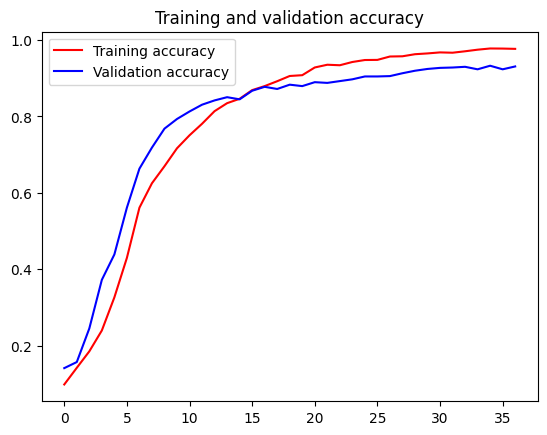

<Figure size 640x480 with 0 Axes>

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

<Figure size 640x480 with 0 Axes>

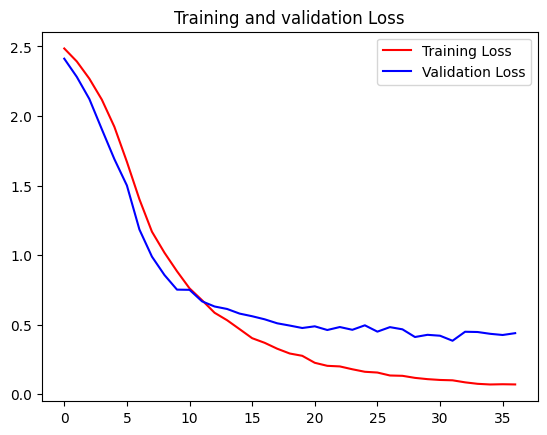

<Figure size 640x480 with 0 Axes>

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

In [21]:
InceptionV3_x_final_model.save('gloapp.h5')